# Step Forward Cross Validation for Bioactivity Predictions

## Implementation of Discovery Yield

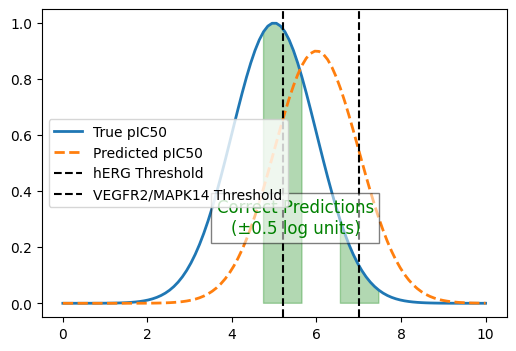

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.exp(-0.5 * (x - 5) ** 2)
y2 = np.exp(-0.5 * (x - 6) ** 2) * 0.9

plt.figure(figsize=(6, 4))
plt.plot(x, y1, label="True pKi", linewidth=2)
plt.plot(x, y2, linestyle="dashed", label="Predicted pKi", linewidth=2)
plt.axvline(5.2, color="black", linestyle="dashed", label="hERG Threshold")
plt.axvline(7.0, color="black", linestyle="dashed", label="VEGFR2/MAPK14 Threshold")
plt.text(5.5, 0.25, "Correct Predictions\n(±0.5 log units)",
         fontsize=12, color="green", ha="center", bbox=dict(facecolor="white", alpha=0.5))
plt.fill_between(x, 0, y1, where=((x >= 4.7) & (x <= 5.7)) | ((x >= 6.5) & (x <= 7.5)), color="green", alpha=0.3)
plt.legend()
plt.savefig("../benchmark/results/figures/discovery_yield.svg", format="svg")

This SVG was edited with Inkscape to produce illustration for discovery yield

Discovery Yield quantifies the fraction of discovery compounds (i.e., compounds classified as highly potent and/or safe) whose predicted  $K_i$  values are within an acceptable error range of their true values.

In [3]:
def compute_discovery_yield(df, target, true_col="true_pKi", pred_col="pred_pKi", epsilon=0.5):
    """
    Computes Discovery Yield (DY): The fraction of discovery compounds for which the predicted pKi is
    within an acceptable error range (±epsilon).

    Parameters:
    - df (pd.DataFrame): DataFrame containing true and predicted pKi values.
    - target (str): The target being evaluated ('hERG', 'VEGFR2', or 'MAPK14').
    - true_col (str): Column name for true pKi values.
    - pred_col (str): Column name for predicted pKi values.
    - epsilon (float): Allowed error range (default = 0.5 log units).

    Returns:
    - DY (float): Discovery Yield, fraction of correct predictions within ±epsilon.
    """
    # Define discovery compound conditions based on the target
    if target == "hERG":
        discovery_mask = df[true_col] < 5.2  # hERG compounds have pKi < 5.2
    else:
        discovery_mask = df[true_col] > 7.0  # VEGFR2 & MAPK14 compounds have pKi > 7.0

    # Subset discovery compounds
    discovery_df = df[discovery_mask]

    # Count correct predictions within ±epsilon
    correct_predictions = (abs(discovery_df[pred_col] - discovery_df[true_col]) <= epsilon).sum()

    # Compute Discovery Yield
    discovery_yield = correct_predictions / len(discovery_df) if len(discovery_df) > 0 else 0.0
    return discovery_yield